### Isentropic Flow

Philipp Schlatter, 2025 LSTM / FAU

Colab: https://colab.research.google.com/github/pschlatt1/notebooks/blob/main/gasdyn.ipynb

Some preliminaries:

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
   # for Google Colab and interative figures
   !pip install -q ipympl ipywidgets
   from google.colab import output
   output.enable_custom_widget_manager()

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

In [3]:
gamma = 1.4

### Isentropic relations

Plots the typical formulas for isentropic one-dimensional compressible flow as function of Mach number $Ma$.

Calculate the various quantities

In [4]:
TT0     = lambda Ma, gamma : 1/(1+(gamma-1)/2*Ma**2)
aa0     = lambda Ma, gamma : np.sqrt(TT0(Ma,gamma))
pp0     = lambda Ma, gamma : TT0(Ma,gamma)**(gamma/(gamma-1))
rhorho0 = lambda Ma, gamma : TT0(Ma,gamma)**(1/(gamma-1))
AA0     = lambda Ma, gamma : Ma*rhorho0(Ma,gamma)*TT0(Ma,gamma)**0.5*(rhorho0(1,gamma)*TT0(1,gamma)**0.5 )**(-1)

In [5]:
pp0(2,gamma)

0.12780452546295093

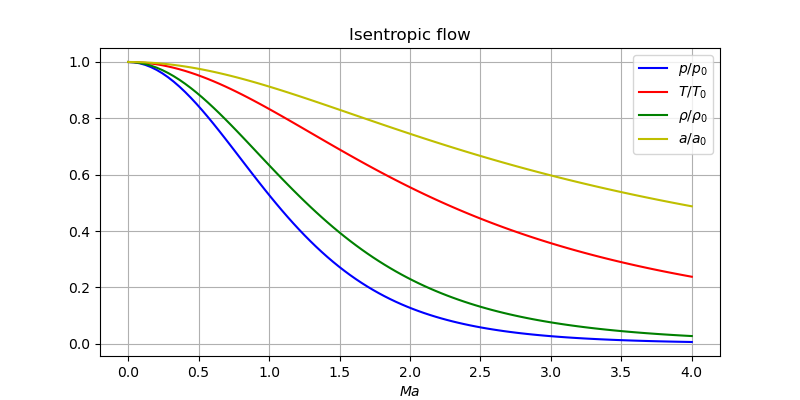

In [6]:
Ma = np.linspace(0,4,100)
plt.figure(figsize=(8,4))
plt.plot(Ma,pp0(Ma,gamma), 'b-',label=r'$p/p_0$')
plt.plot(Ma,TT0(Ma,gamma), 'r-',label=r'$T/T_0$')
plt.plot(Ma,rhorho0(Ma,gamma), 'g-',label=r'$\rho/\rho_0$')
#plt.plot(Ma,AA0(Ma,gamma), 'k-',label=r'$A/A_0$')
plt.plot(Ma,aa0(Ma,gamma), 'y-',label=r'$a/a_0$')
plt.xlabel(r'$Ma$')
plt.legend()
plt.grid()
plt.title('Isentropic flow')
plt.show()

Cricital values at $Ma=1$:

In [7]:
print('p*/p0     = ',pp0(1,gamma))
print('T*/T0     = ',TT0(1,gamma))
print('rho*/rho0 = ',rhorho0(1,gamma))
print('a*/a0     = ',aa0(1,gamma))
print('A*/A0     = ',AA0(1,gamma))

p*/p0     =  0.5282817877171742
T*/T0     =  0.8333333333333334
rho*/rho0 =  0.633938145260609
a*/a0     =  0.9128709291752769
A*/A0     =  1.0


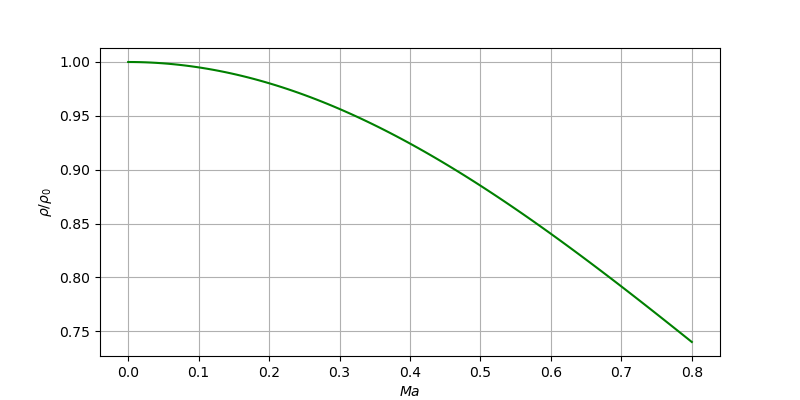

In [11]:
Ma = np.linspace(0,0.8,100)
plt.figure(figsize=(8,4))
plt.plot(Ma,rhorho0(Ma,gamma), 'g-',label=r'$\rho/\rho_0$')
plt.xlabel(r'$Ma$')
plt.ylabel(r'$\rho/\rho_0$')
plt.grid()
plt.show()

### Compressible Bernoulli equation

In [13]:
f_approx = lambda Ma : (1+0.25*Ma**2-(2-gamma)/24*Ma**4)
f = lambda Ma : 2/(gamma*Ma**2)*( (1+(gamma-1)/2*Ma**2)**(gamma/(gamma-1)) -1 )

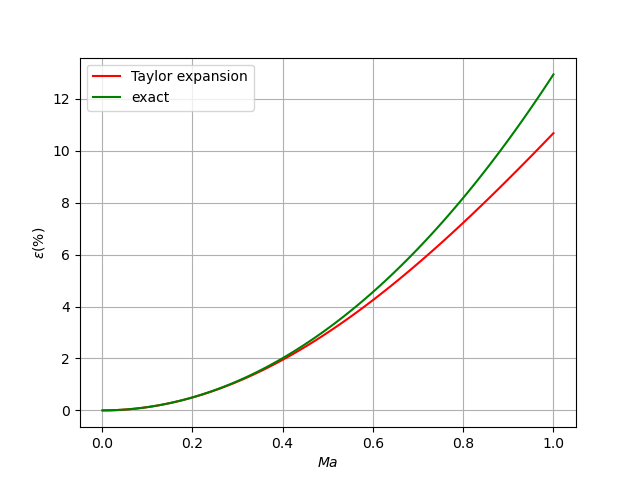

In [35]:
Ma_inf = np.linspace(0.001,1,100)
gamma = 1.4
plt.figure()
plt.xlabel(f'$Ma$')
plt.ylabel(f'$\epsilon(\%)$')
plt.plot( Ma_inf,100*(np.sqrt(f_approx(Ma_inf))-1),'r',label='Taylor expansion')
plt.plot( Ma_inf, 100*(np.sqrt(f(Ma_inf))-1),'g',label='exact')
plt.grid()
plt.legend()
plt.show()

In [30]:
f(0.3)

1.0640722173965615

In [31]:
np.sqrt(f(0.3))

1.0315387619457457